# 1. Data Collection and EDA

This notebook collects and prepares posts from two subreddits using [Pushshift's API](https://github.com/pushshift/api). 

In [1]:
# imports
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

#### Collect and save data for r/weddingplanning and r/divorce

In [2]:
def collect_posts(subreddit):
    """ This function pulls down data from a given subreddit using the Pushshift API and returns the 
    data as a Pandas DataFrame.
    
    args:
        subreddit (str): name of a subreddit
    
    return:
        df (Pandas DataFrame): information from the 4000 most recent posts with text before Thursday, April 21, 2022 8:55:21 PM
    """

    url = 'https://api.pushshift.io/reddit/search/submission'
    
    num_posts = 0
    min_date = 1650599721
    for x in range(40):
        params = {
            'subreddit':subreddit,
            'size':100,
            'is_self':True,
            'meta_data':True,
            'before':min_date
        }
        res = requests.get(url, params)
        if res.status_code == 200:
            posts = pd.DataFrame(res.json()['data'])
            min_date = posts['created_utc'].min()
            if x == 0:
                df = posts
            else:
                df = pd.concat([df,posts],)
            time.sleep(1)
        else:
            print('request_failed')
            return df
    return df

In [3]:
# These function calls were used to collect and save the data

# df_wedding = collect_posts('weddingplanning')

# df_wedding.to_csv('../datasets/wedding.csv',index=False)

# df_divorce = collect_posts('divorce')

# df_divorce.to_csv('../datasets/divorce.csv',index=False)

# df = df_wedding.append(df_divorce)

# df.to_csv('../datasets/combined.csv',index=False)

#### Exploratory Data Analysis

In [4]:
# Import data frames already pulled from API

df = pd.read_csv('../datasets/combined.csv')

In [5]:
# Import data frames already pulled from API

df_wedding = pd.read_csv('../datasets/wedding.csv')

df_divorce = pd.read_csv('../datasets/divorce.csv')

In [6]:
df_wedding.shape

(4000, 80)

In [7]:
df_divorce.shape

(3999, 73)

In [8]:
df.shape

(7999, 82)

In [9]:
df.head()

,Unnamed: 0.1,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,...,suggested_sort,post_hint,preview,author_flair_background_color,banned_by,edited,call_to_action,category,num_posts,distinguished
0,0,0,[],False,theallusionist,NaN,[],NaN,text,t2_7685k,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,1,1,[],False,Asleep_Contest2388,NaN,[],NaN,text,t2_m8qjrlnv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,2,2,[],False,J3llyDonut,NaN,[],NaN,text,t2_iaek90tb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
3,3,3,[],False,Wednesday_Atoms,NaN,[],NaN,text,t2_ccasgn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,4,4,[],False,EudoxiaPrade,NaN,[],NaN,text,t2_itfve,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0.1                   7999 non-null   int64  
 1   Unnamed: 0                     7999 non-null   int64  
 2   all_awardings                  7999 non-null   object 
 3   allow_live_comments            7999 non-null   bool   
 4   author                         7999 non-null   object 
 5   author_flair_css_class         213 non-null    object 
 6   author_flair_richtext          7985 non-null   object 
 7   author_flair_text              242 non-null    object 
 8   author_flair_type              7985 non-null   object 
 9   author_fullname                7985 non-null   object 
 10  author_is_blocked              7999 non-null   bool   
 11  author_patreon_flair           7985 non-null   object 
 12  author_premium                 7985 non-null   o

Will want to drop "Unnamed: 0" column.

In [11]:
# Columns with null values
[x for x in list(zip(df.columns, df.isna().sum())) if x[1] != 0]

[('author_flair_css_class', 7786),
 ('author_flair_richtext', 14),
 ('author_flair_text', 7757),
 ('author_flair_type', 14),
 ('author_fullname', 14),
 ('author_patreon_flair', 14),
 ('author_premium', 14),
 ('link_flair_background_color', 77),
 ('link_flair_css_class', 4019),
 ('link_flair_template_id', 54),
 ('link_flair_text', 9),
 ('selftext', 164),
 ('removed_by_category', 6816),
 ('author_flair_template_id', 7760),
 ('author_flair_text_color', 7731),
 ('author_cakeday', 7979),
 ('poll_data', 7933),
 ('media_metadata', 7968),
 ('thumbnail_height', 7954),
 ('thumbnail_width', 7954),
 ('suggested_sort', 7955),
 ('post_hint', 7838),
 ('preview', 7838),
 ('author_flair_background_color', 7972),
 ('banned_by', 7996),
 ('edited', 7990),
 ('call_to_action', 7999),
 ('category', 7999),
 ('num_posts', 3999),
 ('distinguished', 7997)]

In [12]:
df[['subreddit','selftext','title']].head()

,subreddit,selftext,title
0,weddingplanning,Hello everyone! I’m wondering if it’s common f...,Requiring guest contact info to confirm a rehe...
1,weddingplanning,[removed],Officiant Arriving in Town the Day of Wedding ...
2,weddingplanning,This is one of those things I've never put muc...,How do you find a good officiant?
3,weddingplanning,We’re in the process of booking our May 2023 w...,Each time we hire a vendor we really only have...
4,weddingplanning,I love reading y’alls vents so here’s mine. An...,Vent: So many small things


#### Drop Unnamed column

In [13]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [14]:
df.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,suggested_sort,post_hint,preview,author_flair_background_color,banned_by,edited,call_to_action,category,num_posts,distinguished
0,[],False,theallusionist,NaN,[],NaN,text,t2_7685k,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,[],False,Asleep_Contest2388,NaN,[],NaN,text,t2_m8qjrlnv,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,[],False,J3llyDonut,NaN,[],NaN,text,t2_iaek90tb,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
3,[],False,Wednesday_Atoms,NaN,[],NaN,text,t2_ccasgn,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,[],False,EudoxiaPrade,NaN,[],NaN,text,t2_itfve,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


#### Look at post count by unique author

In [15]:
df['author'].unique()

array(['theallusionist', 'Asleep_Contest2388', 'J3llyDonut', ...,
       'btmbusby', 'MinnCali', 'Pleasant-Series1472'], dtype=object)

In [16]:
df['num_posts'] = [df[df['author'] == user].shape[0] for user in df['author']]

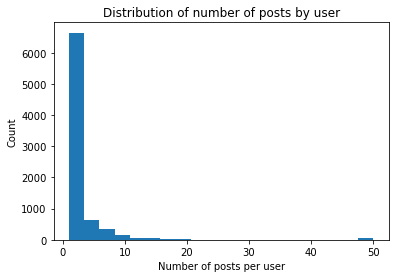

In [17]:
plt.hist(df['num_posts'],bins=20)
plt.title('Distribution of number of posts by user')
plt.xlabel('Number of posts per user')
plt.ylabel('Count');

There is a weird outlier is an author that posts prolifically. Let's explore this.

In [18]:
df[df['num_posts']==50].head(2)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,suggested_sort,post_hint,preview,author_flair_background_color,banned_by,edited,call_to_action,category,num_posts,distinguished
70,[],False,AutoModerator,NaN,[],NaN,text,t2_6l4z3,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,NaN
71,[],False,AutoModerator,NaN,[],NaN,text,t2_6l4z3,False,False,...,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,NaN


This is written by an AutoModerator, so perhaps these posts aren't relevant?

In [19]:
df[df['num_posts']==50]['selftext'].head(5)

70     This is a weekly thread for a more collaborati...
71     Discuss anything on your mind with your fellow...
168    Discuss anything on your mind with your fellow...
290    Discuss anything on your mind with your fellow...
386    Discuss anything on your mind with your fellow...
Name: selftext, dtype: object

Confirmed: These posts are not relevant. Let's drop all posts from the author 'AutoModerator'.

In [20]:
df[df['author'] == 'AutoModerator'].index

Int64Index([  70,   71,  168,  290,  386,  448,  507,  579,  652,  653,  765,
             862,  956, 1071, 1151, 1222, 1312, 1313, 1411, 1516, 1607, 1692,
            1746, 1832, 1833, 1921, 1922, 2025, 2144, 2264, 2359, 2438, 2515,
            2609, 2610, 2720, 2814, 2923, 2999, 3062, 3151, 3245, 3361, 3478,
            3579, 3674, 3789, 3881, 3986, 3987],
           dtype='int64')

In [21]:
df.drop(index=df[df['author'] == 'AutoModerator'].index,inplace=True)

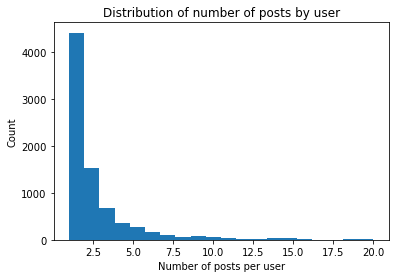

In [22]:
plt.hist(df['num_posts'],bins=20)
plt.title('Distribution of number of posts by user')
plt.xlabel('Number of posts per user')
plt.ylabel('Count');

In [23]:
df.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_css_class', 'link_flair_richtext', 'link_flair_template_id',
       'link_flair_text', 'link_flair_text_color', 'link_flair_type', 'locked',
       'media_only', 'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'retrieved_on', 'score', 'selftext', 'send_replies', 'spoiler',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_sub

In [24]:
df[df['num_posts']==20][['subreddit','selftext']]

,subreddit,selftext
4824,Divorce,I almost feel hatred for him and his kids and ...
4913,Divorce,"And starts trying to love bomb me and shit, bu..."
4975,Divorce,One minute wants to claim me as his wife as if...
5057,Divorce,Talked to my husband today about his last phon...
5062,Divorce,I just got a text from a local number pretendi...
5115,Divorce,Right now it seems he’s in denial.
5174,Divorce,The only thing keeping me sane is God and look...
5209,Divorce,He’s refusing to give me more. Im out of gas a...
6170,Divorce,Told me he’s done and living the single life a...
6261,Divorce,He laughed and said that’s probably for the best


The next most prolific poster seems to be real, so we'll leave them alone.

#### Should we drop posts where selftext == [removed]?

In [25]:
df[df['selftext']=='[removed]']['title']

1       Officiant Arriving in Town the Day of Wedding ...
5       Wedding in 3mo, just ruptured my Achilles’ tendon
17                                     The Preferred List
34                         Tipping on top of service fee?
40                                     Am I in the wrong?
                              ...                        
7959    It hurts so much that STBXW doesn't seem to ca...
7968                              How to Start Mediation?
7969                                       Seeking advice
7978    What do you say when your leaver spouse texts ...
7981    She asked for a divorce on my Birthday. Is tha...
Name: title, Length: 1161, dtype: object

These posts still have a title, and it's not obvious that the posts do or do not have additional value, so I will keep them for now. However, I will keep this in mind to add '[removed'] to the stop_words

#### How do we deal with posts with NaN in selftext?

In [26]:
df['selftext'].isna().sum()

164

Let's fill the NaN with 'NA' and use this as a stop_word.

In [27]:
df['selftext'] = df['selftext'].fillna('NA')

In [28]:
df['selftext'].isna().sum()

0

Let's confirm all posts have a title.

In [29]:
df['title'].isna().sum()

0

#### Number of unique authors

In [30]:
num_unique_auth = len(df['author'].unique())
total_posts = df.shape[0]
print('Number of unique authors: ' + str(num_unique_auth))
print('Mean posts per author: ' + str(round(total_posts/num_unique_auth,1)))

Number of unique authors: 5644
Mean posts per author: 1.4


#### Let's look at length of posts and number of words in each posts.

In [31]:
df['posts_length'] = df['selftext'].apply(len)

In [32]:
df['post_word_count'] = df['selftext'].apply(str.split).apply(len)

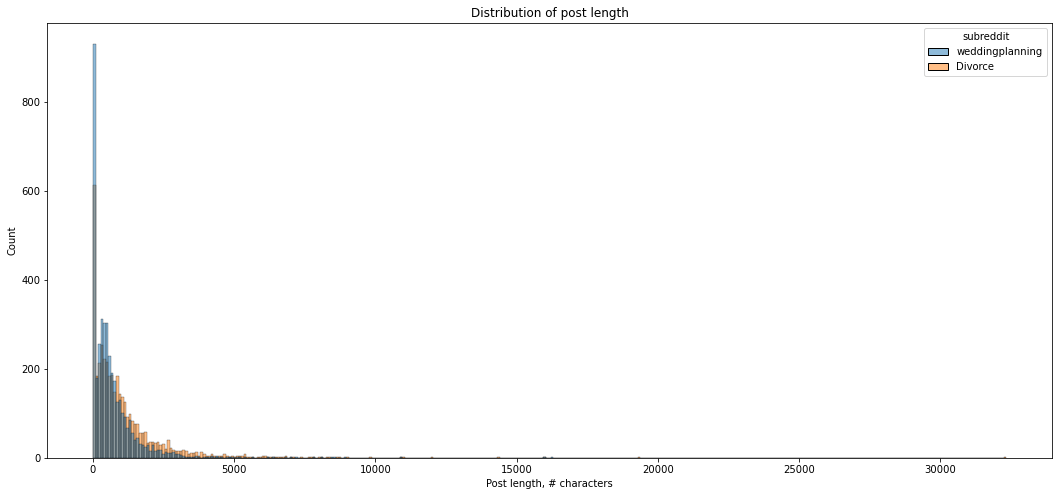

In [33]:
plt.figure(figsize = (18,8))
sns.histplot(data = df, x='posts_length',hue='subreddit')
plt.title('Distribution of post length')
plt.xlabel('Post length, # characters')
plt.ylabel('Count');

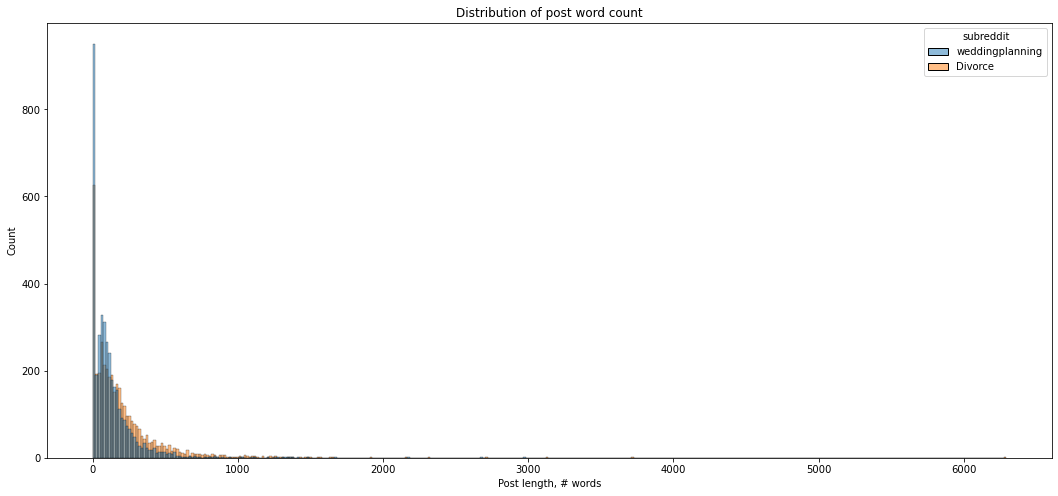

In [34]:
plt.figure(figsize = (18,8))
sns.histplot(data = df, x='post_word_count',hue='subreddit')
plt.title('Distribution of post word count')
plt.xlabel('Post length, # words')
plt.ylabel('Count');

In [35]:
df[df['posts_length'] > 6000]['selftext']

270     Hi all! For the uninitiated, Jamie Wolfer is a...
597     [First, pictures!](https://imgur.com/a/ZvcNlzt...
637     Sorry for the long post, but the details matte...
682     Hello 👋 and I hope your wedding planning is co...
705     \n\n\nOops, first post deleted as wrong pic fo...
945     TLDR: If you want to have a budget bachelorett...
1131    CW: brief, vague mention of child abuse. \n\n&...
2008    A couple of years ago we got engaged. We were ...
2194    Please don’t leave rude or negative comments, ...
2402    &amp;#x200B;\n\nhttps://preview.redd.it/562afp...
2566    A few months back I made [this pity party post...
3040    &amp;#x200B;\n\nhttps://preview.redd.it/tifv3s...
3318    Hello everyone!\n\nSo I am just about to decid...
3522    We estimated $15,000 at the start when we didn...
3647    My husband and I got married last October afte...
3768    I'm confused y'all. I hope this is the place t...
4165    So my STBXW left me in Summer 2019 after a yea...
4236    I gues

These very long posts seem to be real, so I will leave them alone

#### Let's see if there are any duplicate posts.

In [36]:
df.shape

(7949, 82)

In [37]:
df.drop_duplicates(subset=['title'])

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,preview,author_flair_background_color,banned_by,edited,call_to_action,category,num_posts,distinguished,posts_length,post_word_count
0,[],False,theallusionist,NaN,[],NaN,text,t2_7685k,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,503,80
1,[],False,Asleep_Contest2388,NaN,[],NaN,text,t2_m8qjrlnv,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,9,1
2,[],False,J3llyDonut,NaN,[],NaN,text,t2_iaek90tb,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,752,139
3,[],False,Wednesday_Atoms,NaN,[],NaN,text,t2_ccasgn,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1827,342
4,[],False,EudoxiaPrade,NaN,[],NaN,text,t2_itfve,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2211,427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,[],False,btmbusby,NaN,[],NaN,text,t2_12l40v,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2055,395
7995,[],False,MinnCali,NaN,[],NaN,text,t2_eumpx3ir,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1049,211
7996,[],False,tinmaridedonpingue,NaN,[],NaN,text,t2_16fxed,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,370,71
7997,[],False,newlife92021,NaN,[],NaN,text,t2_en3mluz8,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,1428,268


It seems there are a number of duplicates... let's explore those.

In [38]:
post_count = list(zip(df['selftext'].value_counts().keys(),df['selftext'].value_counts()))

Most of the duplicates are the removed, NA, or deleted posts, but some are real duplicates. Let's drop these duplicates.

In [39]:
duplicates = [x[0] for x in post_count if x[1] > 1][3::]

In [40]:
duplicates_index = [df[df['selftext']==x].index[1:] for x in duplicates]

In [41]:
duplicates_index

[Int64Index([6842], dtype='int64'),
 Int64Index([7097], dtype='int64'),
 Int64Index([5631], dtype='int64'),
 Int64Index([5206], dtype='int64'),
 Int64Index([7803], dtype='int64'),
 Int64Index([7031], dtype='int64'),
 Int64Index([6570], dtype='int64'),
 Int64Index([4203], dtype='int64'),
 Int64Index([4897], dtype='int64'),
 Int64Index([1283], dtype='int64'),
 Int64Index([2398], dtype='int64'),
 Int64Index([4172], dtype='int64'),
 Int64Index([6559], dtype='int64'),
 Int64Index([6576], dtype='int64'),
 Int64Index([4096], dtype='int64'),
 Int64Index([6761], dtype='int64')]

In [42]:
for x in duplicates_index:
    df.drop(index=x,inplace=True)

In [43]:
df.shape

(7933, 82)

### Save Cleaned DF for use in other notebooks

In [44]:
#df.to_csv('../datasets/combined_cleaned.csv',index=False)

### EDA on Word Counts

#### Create own stop words list

In [45]:
add_stop_words = ['na','removed','deleted','would','like','get','really']

In [46]:
stop_words = stopwords.words('english')

In [47]:
for word in add_stop_words:
    stop_words.append(word)
    
%store stop_words

Stored 'stop_words' (list)


#### Instantiate and fit Count Vectorizer for selftext

In [48]:
cv = CountVectorizer(stop_words=stop_words,ngram_range=(1,3),min_df=4,max_df=1.0,strip_accents='unicode')

In [49]:
cv.fit(df['selftext'])

CountVectorizer(min_df=4, ngram_range=(1, 3),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents='unicode')

In [50]:
selftext_vect = cv.transform(df['selftext'])

In [51]:
df_selftext_vect = pd.DataFrame(selftext_vect.A, columns=cv.get_feature_names_out())

In [52]:
df_selftext_vect['subreddit'] = df['subreddit']

In [53]:
df_selftext_vect['subreddit_div'] = [1 if x == 'Divorce' else 0 for x in df['subreddit']]

In [54]:
len(df_selftext_vect.columns)

25581

In [55]:
most_common_words_selftext = df_selftext_vect.drop(columns=['subreddit','subreddit_div']).sum().sort_values(ascending=False).head(30)

In [56]:
df_most_common_words_selftext = pd.DataFrame(most_common_words_selftext, columns=['selftext'])
df_most_common_words_selftext['div_frequency_selftext'] = [df_selftext_vect[df_selftext_vect[word]>0]['subreddit_div'].mean() for word in most_common_words_selftext.keys()]

In [57]:
df_most_common_words_selftext

,selftext,div_frequency_selftext
wedding,4702,0.039901
want,4535,0.553183
know,4059,0.593881
time,3803,0.664720
feel,3236,0.630378
one,3166,0.543060
divorce,3031,0.994423
years,2899,0.830448
even,2541,0.652469
going,2494,0.618452


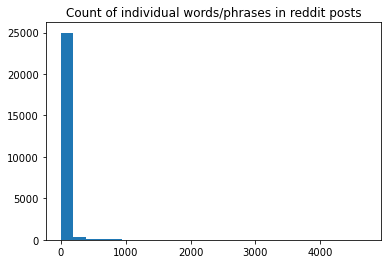

In [58]:
plt.hist(df_selftext_vect.drop(columns=['subreddit','subreddit_div']).sum().sort_values(ascending=False),bins=25);
plt.title('Count of individual words/phrases in reddit posts');

Most words/phrases are infrequently used in redditposts.

#### Instantiate and fit Count Vectorizer for title

In [59]:
cv2 = CountVectorizer(stop_words=stop_words,ngram_range=(1,3),min_df=4,max_df=1.0,strip_accents='unicode')

In [60]:
cv2.fit(df['title'])

CountVectorizer(min_df=4, ngram_range=(1, 3),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents='unicode')

In [61]:
title_vect = cv2.transform(df['title'])

In [62]:
df_title_vect = pd.DataFrame(title_vect.A, columns=cv2.get_feature_names_out())

In [63]:
df_title_vect['subreddit'] = df['subreddit']

In [64]:
df_title_vect['subreddit_div'] = df_selftext_vect['subreddit_div']

In [65]:
len(df_title_vect.columns)

2050

In [66]:
most_common_words_title = df_title_vect.drop(columns=['subreddit','subreddit_div']).sum().sort_values(ascending=False).head(30)

In [67]:
df_most_common_words_title = pd.DataFrame(most_common_words_title, columns=['title'])
df_most_common_words_title['div_frequency_title'] = [df_title_vect[df_title_vect[word]>0]['subreddit_div'].mean() for word in most_common_words_title.keys()]

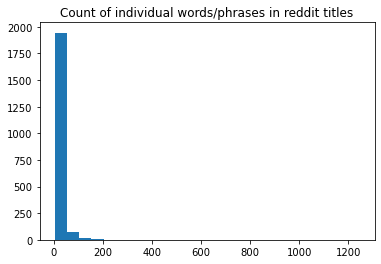

In [68]:
plt.hist(df_title_vect.drop(columns=['subreddit','subreddit_div']).sum().sort_values(ascending=False),bins=25);
plt.title('Count of individual words/phrases in reddit titles');

Most words/phrases are infrequently used in reddit title as well.

In [69]:
df_most_common_words = df_most_common_words_selftext.join([df_most_common_words_title], how = 'outer')

In [70]:
df_most_common_words

,selftext,div_frequency_selftext,title,div_frequency_title
wedding,4702.0,0.039901,1244.0,0.011686
want,4535.0,0.553183,189.0,0.592179
know,4059.0,0.593881,145.0,0.723404
time,3803.0,0.664720,150.0,0.673333
feel,3236.0,0.630378,125.0,0.661157
one,3166.0,0.543060,141.0,0.485075
divorce,3031.0,0.994423,797.0,1.000000
years,2899.0,0.830448,NaN,NaN
even,2541.0,0.652469,NaN,NaN
going,2494.0,0.618452,NaN,NaN


Interesting that the posts and titles have different most common words

Given there is a fair amount of stratification of the most common words between the divorce and wedding planning subreddits, it seems that the model may be able to pick on these differences and accurately predict which reddit the post came from.